<a href="https://colab.research.google.com/github/lindsay99m/GEOL-558-Supervised/blob/main/lmoller_final_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised ML: Volcanic Eruption Classification

# Introduction

I will be using volcanic eruption data from around the world. The dataset was taken from Kaggle, but is orginially data from the Smithsonian Institue.  This data contains the location, volcano, VEI, eruption
start and end data, etc. I will use this data to determine the probability of an eruption based on eruption intervals, volcano, and volcano
type. I am using this data because it has a wide range of eruption data by type, volcano, and has similar data sets that contain other interesting data  like detection
of eruptions via tree ring data and sulfur in ice cores. Historical erruption data is very important as it cannot always be verified like moder eruption data, however it is important to understand the frequency and dormancy of volcanos. This information is important to the public as it can show a trends and patterns in erruption data that can be usful to the public. Many heavliy populated areas are near volcanos so if scientists and pbulic are better able to predict the volcanic activity then it can decrease the amount of loss and damage incured from volcanic events.

# Pre-Processing

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import zipfile
import io

url = 'https://raw.githubusercontent.com/lindsay99m/GEOL-558-Supervised/d1c739cdcca211595b652b9d8c7e9d74d7471789/eruptions.csv.zip'

# download the zip file from the url
import requests
response = requests.get(url)

# extract the CSV file from the zip archive in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('eruptions.csv') as f: # 0pen the 'eruptions.csv' file within the zip archive
        data = pd.read_csv(f) # read the CSV file into a pandas DataFrame

data.describe()

,volcano_number,eruption_number,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude,longitude
count,11178.000000,11178.000000,8272.000000,11177.000000,10985.000000,10982.000000,4332.000000,4329.000000,4326.000000,11178.000000,11178.000000
mean,300284.371176,15666.905439,1.947897,622.848260,3.450888,7.015025,1917.326639,6.220836,13.315996,16.865778,31.572377
std,52321.193203,3297.612433,1.161098,2482.174317,4.071419,9.645386,157.646408,3.686128,9.831282,30.761752,115.248384
min,210010.000000,10001.000000,0.000000,-11345.000000,0.000000,0.000000,-475.000000,0.000000,0.000000,-77.530000,-179.970000
25%,263310.000000,12817.250000,1.000000,680.000000,0.000000,0.000000,1895.000000,3.000000,4.000000,-6.102000,-77.656000
50%,290050.000000,15650.500000,2.000000,1847.000000,1.000000,0.000000,1957.000000,6.000000,15.000000,17.600000,55.708000
75%,343030.000000,18463.750000,2.000000,1950.000000,7.000000,15.000000,1992.000000,9.000000,21.000000,40.821000,139.394000
max,600000.000000,22355.000000,7.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,85.608000,179.580000


In [ ]:
#show the data set fits the parameters
data.shape

(11178, 15)

In [ ]:
#show the number of non-null data in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

This data set contains 15 columns of data with 11,178 recorded eruptions across the world.

In [ ]:
#check to make sure the column names are easily useable or seaerchable
print(data.columns)

Index(['volcano_number', 'volcano_name', 'eruption_number',
       'eruption_category', 'area_of_activity', 'vei', 'start_year',
       'start_month', 'start_day', 'evidence_method_dating', 'end_year',
       'end_month', 'end_day', 'latitude', 'longitude'],
      dtype='object')


In [ ]:
data = data.drop(columns=['evidence_method_dating'])

In [ ]:
data.head()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,2020.0,1.0,12.0,-0.370,-91.550


In [ ]:
#remove are of activity column
data = data.drop(columns=['area_of_activity'])

In [ ]:
# Define a function to categorize VEI
def categorize_vei(vei):
    if vei == 0:
        return 'non explosive'
    elif vei == 1:
        return 'small'
    elif 2 <= vei <= 3:
        return 'moderate'
    elif 4 <= vei <= 5:
        return 'large'
    elif 6 <= vei <= 7:
        return 'very large'
    else:
        return None  # Or handle other cases as needed

# Apply the function to create 'vei_status' column
data['vei_status'] = data['vei'].apply(categorize_vei)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   volcano_number     11178 non-null  int64  
 1   volcano_name       11178 non-null  object 
 2   eruption_number    11178 non-null  int64  
 3   eruption_category  11178 non-null  object 
 4   vei                8272 non-null   float64
 5   start_year         11177 non-null  float64
 6   start_month        10985 non-null  float64
 7   start_day          10982 non-null  float64
 8   end_year           4332 non-null   float64
 9   end_month          4329 non-null   float64
 10  end_day            4326 non-null   float64
 11  latitude           11178 non-null  float64
 12  longitude          11178 non-null  float64
 13  vei_status         8272 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.2+ MB


# EDA

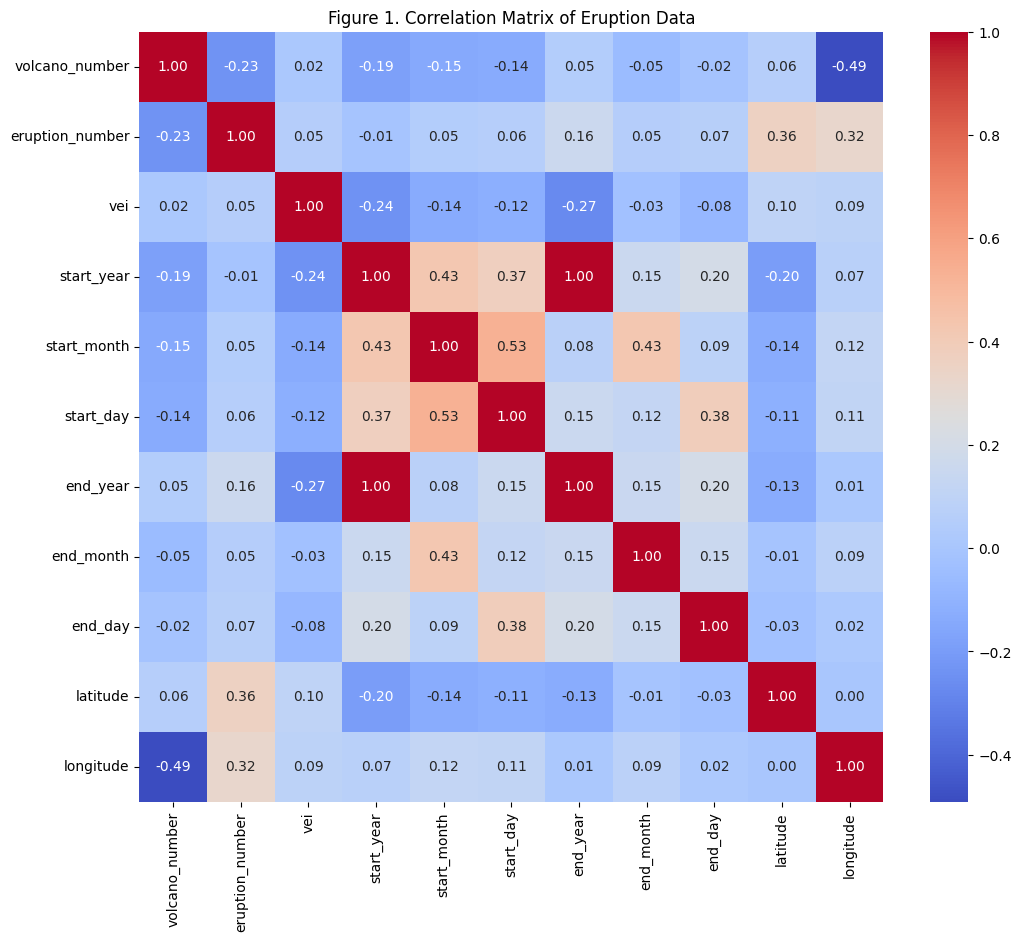

In [ ]:
#consider numerical data only
corr_matrix = data.select_dtypes(include=np.number).corr()

# plot heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 1. Correlation Matrix of Eruption Data')
plt.show()

The correlation heat map shows that there is a correlation with the eruption start and end days, months, and year, and there is a slight correlation with eruption number and latitude and longitude. The date correlation makes sense as most erupution events are not for extended amounts of time and will therefore usually occur for only a few hours to a few days.

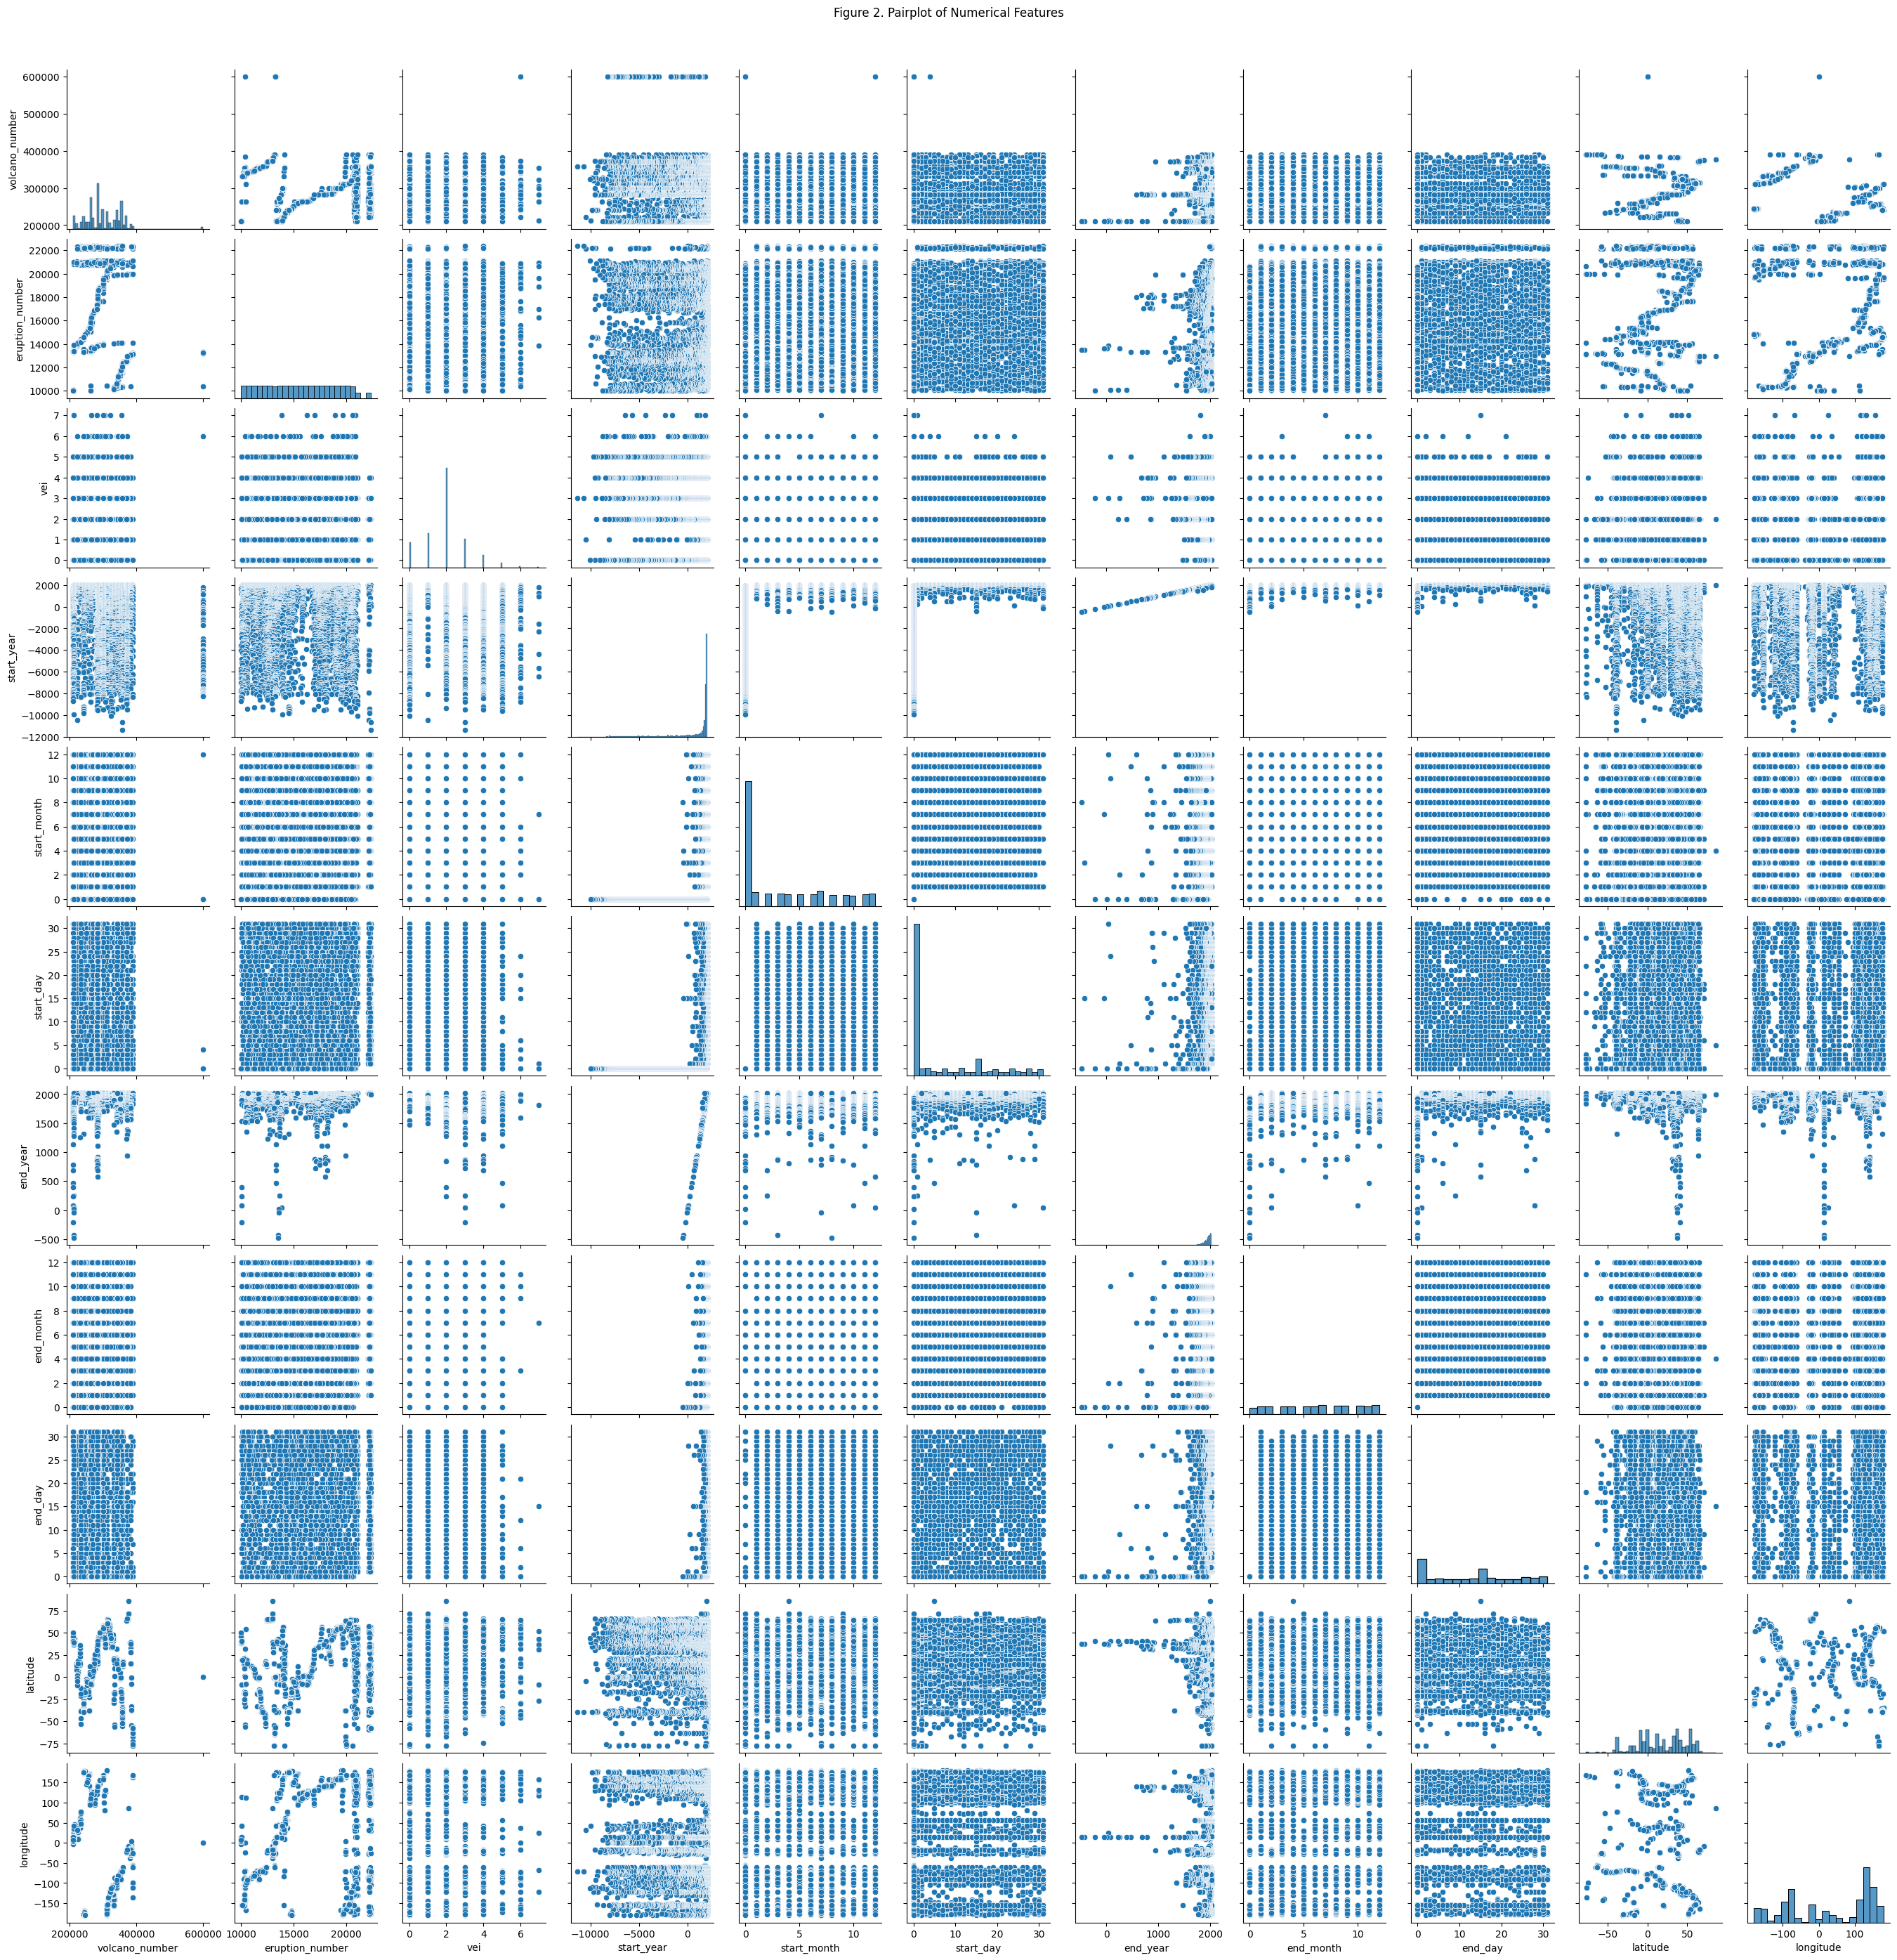

In [ ]:
# plot the pairplot with nuerical data
sns.pairplot(data.select_dtypes(include=np.number))
plt.suptitle('Figure 2. Pairplot of Numerical Features', y=1.02)
plt.show()

Figure 2 shows that there is not a lot of clustering within the data despite with the latitudinal and longitudinal data. this makes sense as most of the volcanos are likely. located around the ring of fire and have likely erupted more than once, therefore there would be more clustering around the lat and long for spots in the ring of fire.

In [ ]:
#print number of unique the volcanos in data set
print(len(data['volcano_name'].unique()))

921


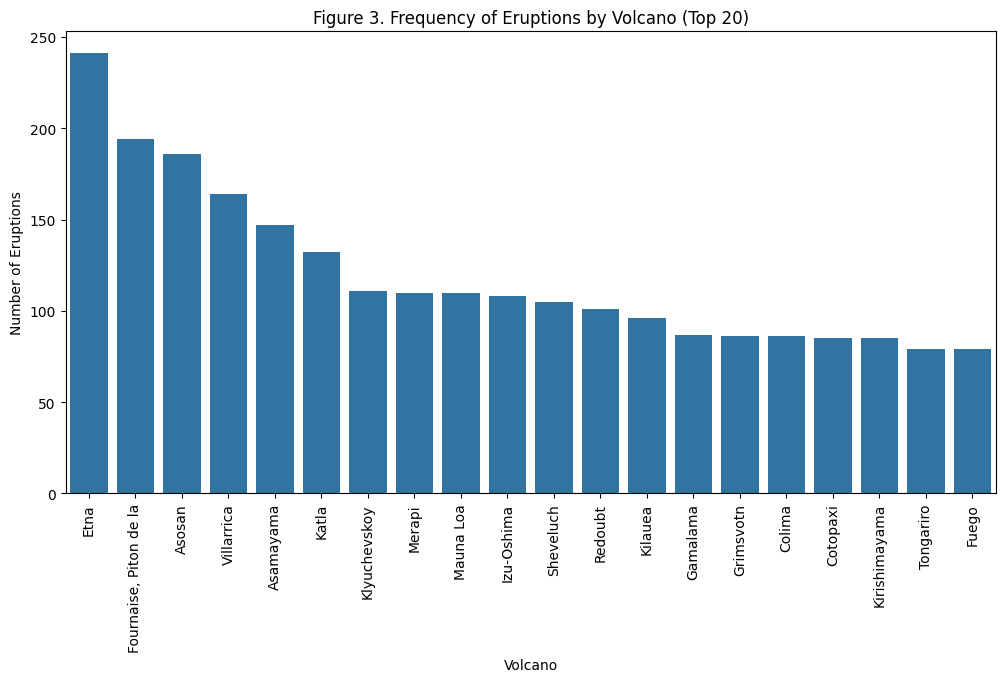

In [ ]:
#plot eruption frequency by volcano - Top 20 only
plt.figure(figsize=(12, 6))

# Get the top 25 most frequent volcanoes
top_20_volcanoes = data['volcano_name'].value_counts().nlargest(20).index

# Filter the data to include only the top 20 volcanoes
filtered_data = data[data['volcano_name'].isin(top_20_volcanoes)]

sns.countplot(x='volcano_name', data=filtered_data, order=top_20_volcanoes)
plt.xticks(rotation=90)
plt.title('Figure 3. Frequency of Eruptions by Volcano (Top 20)')
plt.xlabel('Volcano')
plt.ylabel('Number of Eruptions')
plt.show()

In [ ]:
most_frequent_volcano = data['volcano_name'].value_counts().idxmax()
frequency = data['volcano_name'].value_counts()[most_frequent_volcano]
print(f"The volcano with the highest eruption frequency is: {most_frequent_volcano}")
print(f"{most_frequent_volcano} erupted {frequency} recorded times in the dataset.")

The volcano with the highest eruption frequency is: Etna
Etna erupted 241 recorded times in the dataset.


Figure 3: The frequency plot shows the 20 volcanoes with the highest frequency of eruption and shows that the highest eruption frequency is Etna with 241 eruptions.

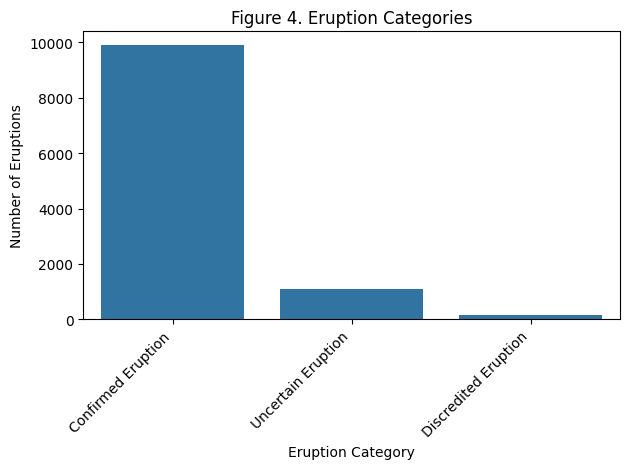

In [ ]:
sns.countplot(x='eruption_category', data=data)
plt.title('Figure 4. Eruption Categories')
plt.xlabel('Eruption Category')
plt.ylabel('Number of Eruptions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
discredited = data['eruption_category'].value_counts()['Discredited Eruption']
print(f"{discredited} of the recorded potential eruptions were not eruptions.")

166 of the recorded potential eruptions were not eruptions.


In [ ]:
confirmed = data['eruption_category'].value_counts()['Confirmed Eruption']
print(f"{confirmed} of the recorded potential eruptions are confirmed eruptions.")

9900 of the recorded potential eruptions are confirmed eruptions.


Figure 4 shows the number of potentially recorded eruptions are actual eruptions, how many are still considered potential eruptuons and how many events previously thought to be eruptions are not. The data set is highly sweked towards confirmed eruptions so "eruption_category" is likely not a good feature to model.

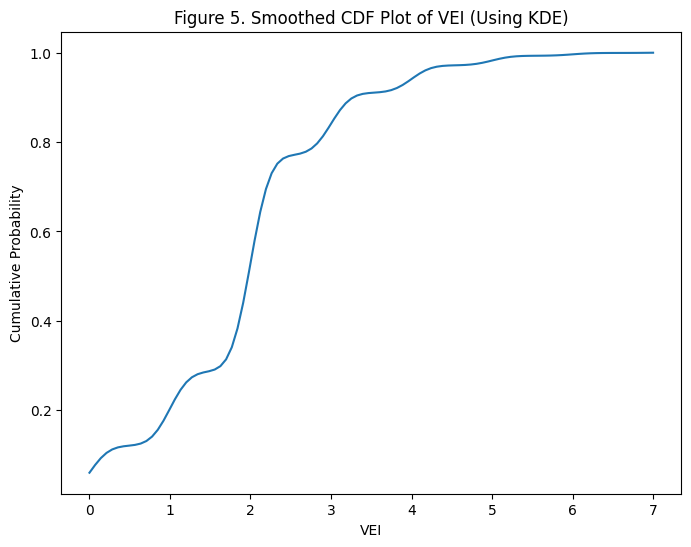

In [ ]:
# create a CDF plot for the VEI
import scipy.stats as stats
vei_data = data['vei'].dropna()  # Remove any missing values

# Generate the CDF using KDE
kde = stats.gaussian_kde(vei_data)  # Use Gaussian kernel
x = np.linspace(vei_data.min(), vei_data.max(), 100)  # Create x-axis values

# Calculate cumulative probabilities using a loop
y_cdf = np.zeros(len(x))
for i in range(len(x)):
    y_cdf[i] = kde.integrate_box_1d(-np.inf, x[i])

# Plot the smoothed CDF
plt.figure(figsize=(8, 6))
plt.plot(x, y_cdf)
plt.title('Figure 5. Smoothed CDF Plot of VEI (Using KDE)')
plt.xlabel('VEI')
plt.ylabel('Cumulative Probability')
plt.show()

Figure 5 shows the the eruption strength is not evenly distributed in the dataset and shows that the highest number of eruptions are recorded from 0-3 VEI.

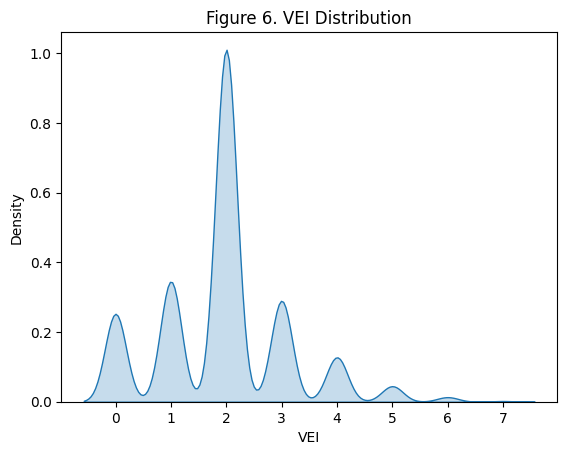

In [ ]:
sns.kdeplot(data['vei'], fill=True)
plt.title('Figure 6. VEI Distribution')
plt.xlabel('VEI')
plt.ylabel('Density')
plt.show()

Figure 6 shows the majority of recorded eruptions have a VEI of 2. This is considered a moderately explosive eruption on the VEI scale so on average the recorded eruptions have a potential threat to human life.

vei_status
large             683
moderate         5158
non explosive    1001
small            1370
very large         60
Name: vei, dtype: int64


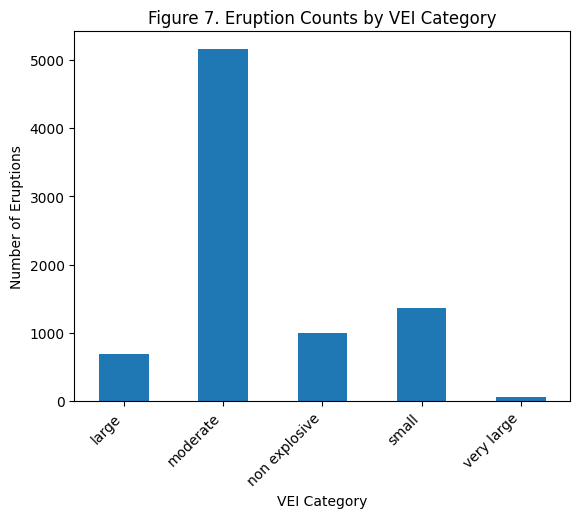

In [ ]:
# Group data by 'vei_status' and get eruption counts
eruptions_by_vei = data.groupby('vei_status')['vei'].count()

# Print the results
print(eruptions_by_vei)

# You can also visualize  using a bar plot
eruptions_by_vei.plot(kind='bar')
plt.title('Figure 7. Eruption Counts by VEI Category')
plt.xlabel('VEI Category')
plt.xticks(range(len(eruptions_by_vei.index)), eruptions_by_vei.index, rotation=45, ha='right')
plt.ylabel('Number of Eruptions')
plt.show()

Figure 7 shows the number of eruptions recorded based on the given vei cateorgies on how explosive the eruptions were. The smallest number of eruptions fall into the very large explosion categoriy with 60 eruptions and the most eruptions fall under the moderate explosive category with 5158 recorded eruptions. It shows that very few eruptions are large to very large and therefore the most common eruptions have lower threat to human life.

# Supervised Methods

In [ ]:
#scale the data
numerical_features = data.select_dtypes(include=np.number).drop(columns=['volcano_number', 'eruption_number', 'latitude', 'longitude']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the scaled data
print(data.head())

   volcano_number            volcano_name  eruption_number  \
0          266030                 Soputan            22354   
1          343100              San Miguel            22355   
2          233020  Fournaise, Piton de la            22343   
3          345020      Rincon de la Vieja            22346   
4          353010              Fernandina            22347   

    eruption_category  vei  start_year  start_month  start_day  end_year  \
0  Confirmed Eruption  NaN    0.562899    -0.110750   1.657342  0.651364   
1  Confirmed Eruption  NaN    0.562899    -0.356375   1.553661  0.651364   
2  Confirmed Eruption  NaN    0.562899    -0.356375   0.309486  0.651364   
3  Confirmed Eruption  NaN    0.562899    -0.602001   2.486792  0.651364   
4  Confirmed Eruption  NaN    0.562899    -0.602001   0.516848  0.651364   

   end_month   end_day  latitude  longitude vei_status  
0  -0.602554 -1.151152     1.112    124.737       None  
1  -1.145192  0.883405    13.434    -88.269       None  

In [ ]:
#split the data
from sklearn.model_selection import KFold

from sklearn.cluster import KMeans
n_clusters = 5  # Number of spatial folds
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['spatial_cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])

# 2. Perform spatial K-fold cross-validation
for fold in range(n_clusters):
    # Get the indices for the training and testing sets for this fold
    train_index = data[data['spatial_cluster'] != fold].index
    test_index = data[data['spatial_cluster'] == fold].index

    # Split the data into training and testing sets
    X_train, X_test = data.drop(columns=['vei_status', 'spatial_cluster']).iloc[train_index], data.drop(columns=['vei', 'spatial_cluster']).iloc[test_index]
    y_train, y_test = data['vei_status'].iloc[train_index], data['vei_status'].iloc[test_index]

    # Now you have X_train, X_test, y_train, y_test for the current fold
    # You can train and evaluate your model here

    print(f"Fold {fold + 1}:")
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)
    print("-" * 20)  # Separator between folds

Fold 1:
X_train shape: (8712, 13)
y_train shape: (8712,)
X_test shape: (2466, 13)
y_test shape: (2466,)
--------------------
Fold 2:
X_train shape: (8311, 13)
y_train shape: (8311,)
X_test shape: (2867, 13)
y_test shape: (2867,)
--------------------
Fold 3:
X_train shape: (9567, 13)
y_train shape: (9567,)
X_test shape: (1611, 13)
y_test shape: (1611,)
--------------------
Fold 4:
X_train shape: (9737, 13)
y_train shape: (9737,)
X_test shape: (1441, 13)
y_test shape: (1441,)
--------------------
Fold 5:
X_train shape: (8385, 13)
y_train shape: (8385,)
X_test shape: (2793, 13)
y_test shape: (2793,)
--------------------


I decided to use k-fold clustering because K-fold cross validation allows for the data to be split into a group of “fold” and then the model trained and evaluated the number of “folds” that are input. This helps decrease overfitting in the model and helps to ensure that the model is tested on various portions of the data, improving the model’s ability to generalize. K-fold specifically aligns well with volcanic data because it can continuously test the model on various subsets of the data which can improve the model’s ability to predict eruptions. It is also a good splitting method to use on historical data to predict future events. To avoid random splitting I split the data with spatial clusteing using the latitude and longitude data in my dataset.

In [ ]:
# Drop rows with NaN values
data = data.dropna()

## Logistic Regression

I am running the logistic regression model as a good baseline in order to compare my other models against.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

# Convert 'vei' to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
data['eruption_category'] = label_encoder.fit_transform(data['vei'])

# Define features (X) and target (y)
X = data[['vei','latitude', 'longitude']].copy()  # Create a copy
y = data['eruption_category']

# Initialize KFold with the desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Shuffle and set random_state

# Store accuracy and classification reports for each fold
accuracy_scores_lr = []
f1_scores_lr = []
classification_reports_lr = []

# Iterate through the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert y_train to a NumPy array with appropriate dtype
    y_train = y_train.to_numpy().astype(int)

    # Initialize and train the logistic regression model
    model = LogisticRegression(solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model and store results
    accuracy_lr = accuracy_score(y_test, y_pred)
    accuracy_scores_lr.append(accuracy_lr) # changed accuracy to accuracy_lr
    classification_reports_lr.append(classification_report(y_test, y_pred, zero_division=1))

    f1_lr = f1_score(y_test, y_pred, average='weighted')  # Calculate weighted average F1-score
    f1_scores_lr.append(f1_lr)  # Store the F1-score, changed f1 to f1_lr

    print(f"Fold {fold + 1}: Accuracy = {accuracy_lr}")
    print(f"Fold {fold + 1}: Classification Report:\n", classification_reports_lr[fold]) #add this line to print classification report of this fold

# Calculate and print average accuracy and F1-score
average_accuracy_lr = np.mean(accuracy_scores_lr)
average_f1_lr = np.mean(f1_scores_lr)  # Calculate average F1-score
print(f"\nAverage Accuracy across all folds: {average_accuracy_lr}")
print(f"\nAverage F1-score across all folds: {average_f1_lr}")  # Print average F1-score

Fold 1: Accuracy = 0.6650717703349283
Fold 1: Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      0.36      0.53       199
           2       0.63      1.00      0.77       404
           3       0.32      0.14      0.19       131
           4       0.00      0.00      0.00        28
           5       1.00      0.00      0.00         8
           6       1.00      0.00      0.00         2
           7       1.00      0.00      0.00         1

    accuracy                           0.67       836
   macro avg       0.74      0.31      0.31       836
weighted avg       0.68      0.67      0.60       836

Fold 2: Accuracy = 0.6818181818181818
Fold 2: Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      0.36      0.53       200
           2       0.64      1.00      0.78   

The logistic regression method showed that the model was able to some what accurately with and average accuracy of about 70% and an average f-1 score of about 64% in predicting VEI of future eruptions. This shows that there is room for improvemnt with this model, but it is unlikely that the model is leaking data.

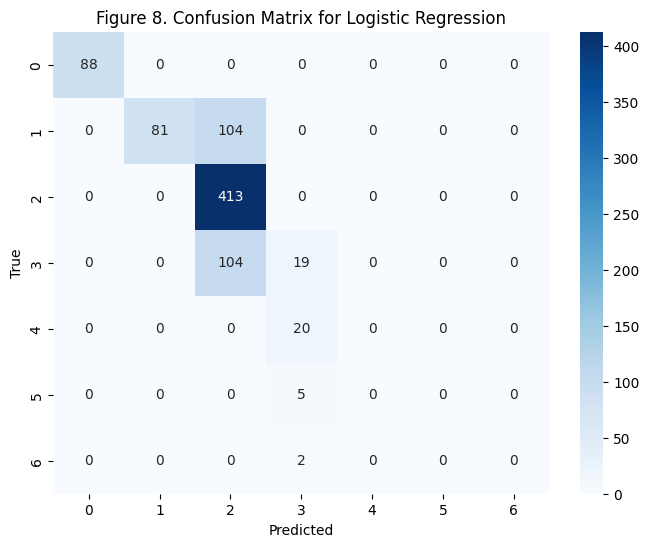

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Figure 8. Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The model was able to accurately predict lower level eruptions with a VEI of 0 and 1, but began to struggle with the higher VEI. The model was able to accurately predicit 413 VEI 2 eruptions but misscalutaed 104 VEI 2 eruptions as VEI 1 and 104 as VEI 3. The model was only able to accurately predict 19 VEI 3 eruptions and miscalcuated 27 of them as VEI 4-6.

## K-Nearest Neighbors (KNN)

I chose to use the KNN model to use next as it trains based off of neighbooring data so I thought it would be interesting to see how that would effect the outcome of the model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Convert 'vei' to numerical labels
label_encoder = LabelEncoder()
data['eruption_category'] = label_encoder.fit_transform(data['vei'])

# Define features (X) and target (y)
X = data[['vei','latitude', 'longitude']].copy()  # Create a copy
y = data['eruption_category']

# Initialize KFold with the desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Shuffle and set random_state

# Store accuracy and classification reports for each fold
accuracy_scores_knn = []
f1_scores_knn = []
classification_reports_knn = []

# Iterate through the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the KNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    # Make predictions
    y_pred_knn = knn_model.predict(X_test)

    # Evaluate the model and store results
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracy_scores_knn.append(accuracy_knn)
    classification_reports_knn.append(classification_report(y_test, y_pred_knn, zero_division=1))

    f1_knn = f1_score(y_test, y_pred, average='weighted')  # Calculate weighted average F1-score
    f1_scores_knn.append(f1_knn)  # Store the F1-score

    print(f"Fold {fold + 1}: Accuracy = {accuracy_knn}")
    print(f"Fold {fold + 1}: Classification Report:\n", classification_reports_knn[fold]) #add this line to print classification report of this fold

# Calculate and print average accuracy and F1-score
average_accuracy_knn = np.mean(accuracy_scores_knn)
average_f1_knn = np.mean(f1_scores_knn)  # Calculate average F1-score
print(f"\nAverage Accuracy across all folds: {average_accuracy_knn}")
print(f"\nAverage F1-score across all folds: {average_f1_knn}")  # Print average F1-score

Fold 1: Accuracy = 0.8624401913875598
Fold 1: Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        63
           1       0.92      0.80      0.86       199
           2       0.85      0.96      0.90       404
           3       0.85      0.79      0.82       131
           4       0.72      0.46      0.57        28
           5       1.00      0.12      0.22         8
           6       1.00      0.00      0.00         2
           7       1.00      0.00      0.00         1

    accuracy                           0.86       836
   macro avg       0.90      0.51      0.53       836
weighted avg       0.87      0.86      0.85       836

Fold 2: Accuracy = 0.8803827751196173
Fold 2: Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91        87
           1       0.94      0.88      0.91       200
           2       0.86      0.98      0.92   

The KNN method showed that the model was able to some what accurately with and average accuracy of about 88% and an average f-1 score of 42% in predicting VEI of future eruptions. This shows that there is still room for improvement, but it is unlikely that the model is leaking data.

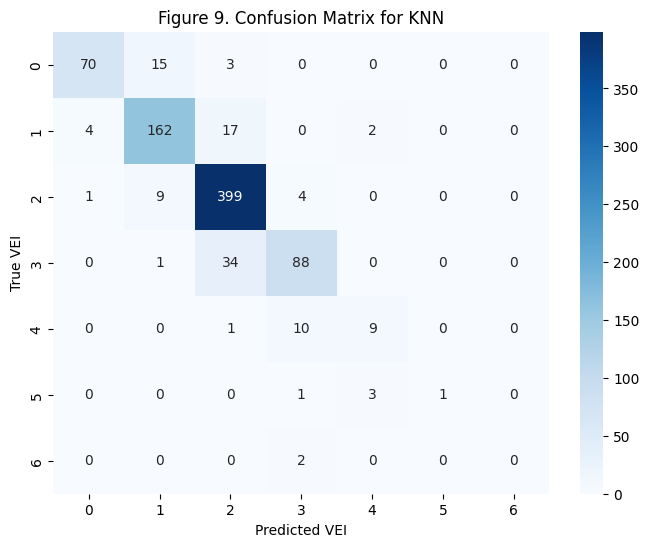

In [ ]:
#create confusion matrix for KNN
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Figure 9. Confusion Matrix for KNN')
plt.xlabel('Predicted VEI')
plt.ylabel('True VEI')
plt.show()

The confusion matrix for the KNN model shows that the model's predictability was a little more scattered across the board than the Logistic Regression model. It was able to preform better on predicting eruptions with a VEI of 2 and 3 than the logistic regression model, but had more incorrect predictions for VEI 0 and 1. There were some significant miss classifications as 2 VEI 1 eruptions were predicted as VEI 4s. This shows that the model was overall less consistant than the logistic regression model.

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Convert 'vei' to numerical labels
label_encoder = LabelEncoder()
data['eruption_category'] = label_encoder.fit_transform(data['vei'])

# Define features (X) and target (y)
X = data[['vei','latitude', 'longitude']].copy()  # Create a copy
y = data['eruption_category']

# Initialize KFold with the desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Shuffle and set random_state

# Store accuracy and classification reports for each fold
accuracy_scores_dt = []
f1_scores_dt = []
classification_reports_dt = []

# Iterate through the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Decision Tree Classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred_dt = dt_classifier.predict(X_test)

    # Evaluate the model and store results
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    accuracy_scores_dt.append(accuracy_dt)
    classification_reports_dt.append(classification_report(y_test, y_pred_dt, zero_division=1))

    print(f"Fold {fold + 1}: Accuracy = {accuracy_dt}")
    print(f"Fold {fold + 1}: Classification Report:\n", classification_reports_dt[fold])

# Evaluate the model and store results
    accuracy_dt = accuracy_score(y_test, y_pred)
    accuracy_scores_dt.append(accuracy_dt)
    classification_reports_dt.append(classification_report(y_test, y_pred, zero_division=1))

    f1_dt = f1_score(y_test, y_pred, average='weighted')  # Calculate weighted average F1-score
    f1_scores_dt.append(f1_dt)  # Store the F1-score

    print(f"Fold {fold + 1}: Accuracy = {accuracy_dt}")
    print(f"Fold {fold + 1}: Classification Report:\n", classification_reports_dt[fold]) #add this line to print classification report of this fold

# Calculate and print average accuracy and F1-score
average_accuracy_dt = np.mean(accuracy_scores_dt)
average_f1_dt = np.mean(f1_scores_dt)  # Calculate average F1-score
print(f"\nAverage Accuracy across all folds: {average_accuracy_dt}")
print(f"\nAverage F1-score across all folds: {average_f1_dt}")  # Print average F1-score

Fold 1: Accuracy = 0.9988038277511961
Fold 1: Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00       404
           3       1.00      1.00      1.00       131
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00         8
           6       0.67      1.00      0.80         2
           7       1.00      0.00      0.00         1

    accuracy                           1.00       836
   macro avg       0.96      0.88      0.85       836
weighted avg       1.00      1.00      1.00       836

Fold 1: Accuracy = 0.4126794258373206
Fold 1: Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00   

The Decision Tree method showed that the model was able to some what accurately with and average accuracy of about 74% and an average f-1 score of about 42% in predicting VEI of future eruptions. This shows that there is still room for improvement, but it is unlikely that the model is leaking data.

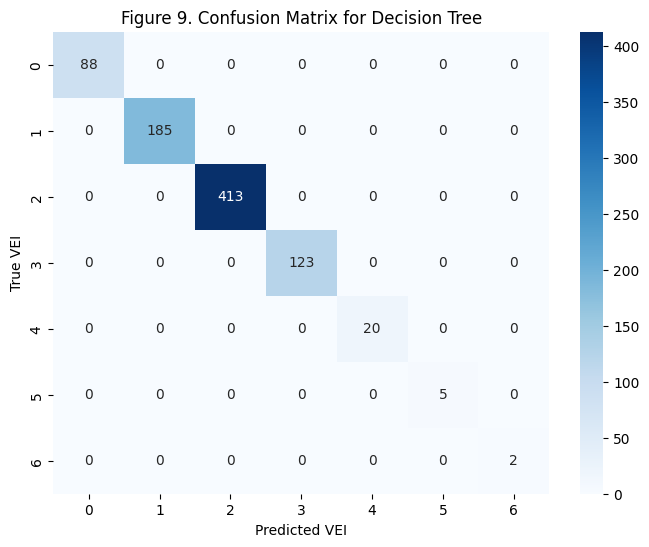

In [ ]:
#create confusion matrix for DT
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Figure 9. Confusion Matrix for Decision Tree')
plt.xlabel('Predicted VEI')
plt.ylabel('True VEI')
plt.show()

The confusion matrix for the Decision Tree model shows that the model did not predict any fasle positives, which shows that the model preformed very well, however it does not match the average accuracy and f-1 scores that were calculated.

# Conclusion

Overall the supervised models showed that is is possible to estimate future volcanic eruption strengths based off of historcal eruption data from ice cores, historical oberservations, and tree ring data. The eruption strength was generally predicted correctly or within a level of the actual recorded VEI. Occasionally the models predicted higher VEIs than recorded and there were a few times predicted lower VEIs than recorded. While it is better to predict higher VEIs than lower VEIs to properly prepare populations that live near volcanos, if too many eruptions are predicted to be much larger than they end up being it could desensitize people to the alerts so there are still imporvements need for the model. It is however problematic to predict significantly lower VEIs than recorded as it could leave populations vulnerable to explosive eruptions if they are not properly evactuated or prepared. In general my models still have room for imporvement and should er on the side of predicting higher VEIs than lower VEIs in comparisson to the recorded data. In future models I would like to use eruption duration and interval time between eruptions to see if a supervised model could use that to predict future VEI or vice versa.

# Write up

### Which method did you like the most?


I liked the logistic regression method and KNN the best. While this might be due to me still being new to supervised machine learning, the logistic regression method and KNN showed the most variation between folds, which makes me feel more trusting in the model because of the variability it showed.

### Which method did you like the least?

I liked the the decision tree model it seemed like there was potential for data leaking with how the confusion matrix was mapped. The confusion matrix showed no fasle positives or negatives which makes me believe that there was some data leakage.

### How did you score these supervised models?

I scored these models with classification reports. This takes into account not only accuracy, but recall precision, and f-1 which are weighted and less likey to be sckewed into being overly correct. I pulled out average accuracy and average f-1 scores as a way to more easily see the scores.

### Did the output align with your geologic understanding?

In general the output aligned with my geologic understanding as its likely that eruptions recorded at the same latitude and longitude multiple times make it more likely that there is infact volcanic activity occuring (whether it is recorded through observations, ice cores, sulfur, or other methods). In the future I would like to incorpate interval and duration and model it against VEI. it is also more likely for smaller eruptions to occur than larger eruptions as most volcanos that are active vent and therefore do not have very explosive events.

### Did you hyperparameter tune? Why or why not?

I did not hyperparameter tune for these models as I wanted to see what the base models would predict and what my results would look like without hyperparamter tuning after fixing my models from the data leakage in my first pass.

### How did you split your data? and why does that make sense for this dataset?

I split my data using K-fold cross-validation and used spatial clustering because my dataset is spatially autocorrelated.

### What did you want to learn more about?

I would like to learn more about the different kinds of models in order to better determine which method would work best with my dataset. I switched my models feature from eruption_category in my first pass to vei in my final pass and found that my models were able to perform more accurately (likely with less leakage). I would like to learn how to incorperate predicting interval between eruptions and eruption duration and modeling it against VEI.

### Did you pre-process your data? Do all models require pre-processing?

I did some like pre-processing by removing unnesessary columns and removing NaN data. While not all models require pre-processing it is better to do some level of preprocessing to ensure that your models run smoothly.